In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv("datasets_156197_358170_Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


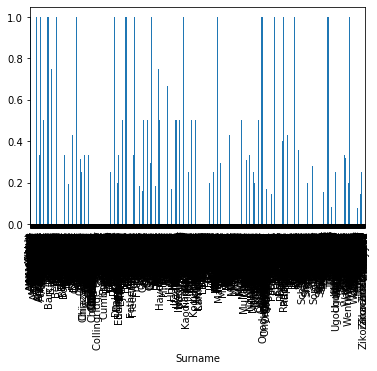

In [4]:
data.groupby('Surname')['Exited'].mean().plot.bar()

In [5]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [6]:
X=data.iloc[:,5:12].values

In [7]:
y=data.iloc[:,-1].values

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
X=scaler.fit_transform(X)
X

array([[-1.09598752,  0.29351742, -1.04175968, ..., -0.91158349,
         0.64609167,  0.97024255],
       [-1.09598752,  0.19816383, -1.38753759, ..., -0.91158349,
        -1.54776799,  0.97024255],
       [-1.09598752,  0.29351742,  1.03290776, ...,  2.52705662,
         0.64609167, -1.03067011],
       ...,
       [-1.09598752, -0.27860412,  0.68712986, ..., -0.91158349,
        -1.54776799,  0.97024255],
       [ 0.91241915,  0.29351742, -0.69598177, ...,  0.80773656,
         0.64609167, -1.03067011],
       [-1.09598752, -1.04143285, -0.35020386, ..., -0.91158349,
         0.64609167, -1.03067011]])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
y_pred=clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.791

In [15]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,None]
  
    
}

In [16]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [17]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]},


In [18]:
grid.best_estimator_


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
grid.best_score_

0.85475